In [1]:
import matplotlib.pyplot as plt
from project import SolverLP
%matplotlib inline

In [2]:
graph = dict()
reverse_graph = dict()
nodes = 5
edges = 4
inp = [(0, 1, 0.2, 0.05),
       (2, 1, 0.3, 0.05),
       (1, 3, 0.25, 0.05),
       (1, 4, 0.1, 0.1)]
e = [(0, 1), (2, 1), (1, 3), (1, 4)]
edge = []
for i in range(edges):
    u, v, d, r = inp[i][0], inp[i][1], inp[i][2], inp[i][3]
    edge.append((u, v, d, r))
    if u in graph:
        graph[u].append((v, d, r, i))
    else:
        graph[u] = [(v, d, r, i)]
    if v in reverse_graph:
        reverse_graph[v].append((u, d, r, i))
    else:
        reverse_graph[v] = [(u, d, r, i)]

source = [0, 2]
destination = [3]
s_to_d = [(0, 3), (2, 3)]
lim_s = dict()
lim_R = dict()
solv = SolverLP(nodes, edge, source, destination, graph, reverse_graph, s_to_d, lim_s, lim_R)
solv.Solve()

[0.011142064800601379, 0.02591234420502713]

In [3]:
import networkx as nx

In [4]:
G = nx.DiGraph()

In [77]:
G.add_nodes_from(range(nodes))
w = solv.edgesWeight()
for i in range(len(e)):
    if w[i] != 0:
        G.add_edge(e[i][0], e[i][1], color='b', weight=w[i]*200)
    else:
        G.add_edge(e[i][0], e[i][1], color='r', weight=0)
colors = [G[u][v]['color'] for u, v in G.edges]
weights = [G[u][v]['weight'] for u,v in G.edges]
pos = nx.circular_layout(G)

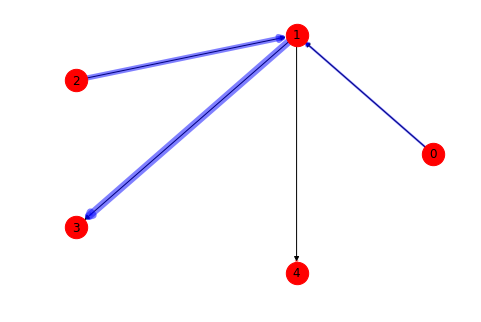

In [78]:
nx.draw(G, pos, with_labels=True, node_size=500)
nx.draw_networkx_edges(G, pos, edge_color=colors, alpha=0.5, width=weights)

In [71]:
G[0][1]

{'color': 'b', 'weight': 1.6713097200902067}

In [ ]:
solv.Clear()